# Salary Prediction Exploratory Data Analysis (EDA)

## 1. Defining the problem
### According to the survey done by Tech Wire found [here](https://www.wraltechwire.com/2019/03/27/were-very-underpaid-say-56-of-tech-workers-in-survey/) 56% of tech employees feel that they are underpaid.

Graduate Students always struggle to negotiate their salary even after researching at their first job. So, I came across this dataset and wanted to explore and predict salary from the job description. In this notebook we would try to explore data and perform some basic analysis by taking an indepth first view into it.

The CSV files in the data are:
 - train_features.csv
 - train_salaries.csv
 - test_features.csv

The training data has the following features:
 - jobId
 - companyId
 - jobType
 - degree
 - major
 - industry
 - yearsExperience
 - milesFromMetropolis

I will be using Machine Learning to train features listed above and predict the salaries based on the training features. 

In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings("ignore")

#__author__ = Monish Khambhati
#__email__ = monish.khambhati@gmail.com

## 2. Load the data

In [4]:
train_features_df = pd.read_csv('data/train_features.csv')

In [5]:
train_salaries_df = pd.read_csv('data/train_salaries.csv')

In [6]:
test_features_df = pd.read_csv('data/test_features.csv')

## 3. Examine the data

In [7]:
train_features_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [8]:
train_salaries_df.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [9]:
test_features_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


## 4. Determining length and dtypes of all dataframes

In [10]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [11]:
train_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [12]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


## 5. Checking for duplicates in all dataframes

In [13]:
train_features_df.duplicated().sum()

0

In [14]:
train_salaries_df.duplicated().sum()

0

In [15]:
test_features_df.duplicated().sum()

0

## 6. Identifying numerical and categorical columns

In [16]:
train_features_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [17]:
numeric_cols = ['yearsExperience', 'milesFromMetropolis' ]

In [18]:
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

## 7. Summarizing categorical and numerical data 

In [19]:
train_features_df.describe(include = [np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [20]:
train_features_df.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684673524,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


## 8. Merge train and target features into single dataframe i.e merge _train_feature_df_ and _train_salaries_df_

In [21]:
train_df = pd.merge(train_features_df, train_salaries_df, on = ['jobId'])

In [22]:
# del train_features_df
# del train_salaries_df

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [24]:
train_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


## 9. Visualizing the target variable using matplotlib

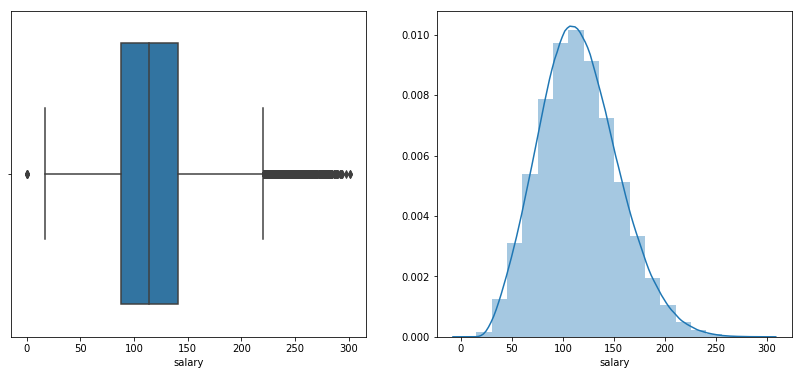

In [25]:
# Visualizing Salary using Matplolib
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins = 20)
plt.show()

## 10. Examining Skewness and Kurtosis

In [26]:
print('Salary Skewness:', train_df['salary'].skew())
print('Salary Kurtosis:', train_df['salary'].kurt())

Salary Skewness: 0.346415074651208
Salary Kurtosis: -0.025578660590093172


Here, the Skewness of the target variable is 0.34 and hence we can sya that the Salary distrbution is approximately symmetric.
Also, the Kurtosis of the target varaible is -0.022 which is in acceptable range of -2 and +2. Hence, we can conclude that it is acceptable univariate normal distirbution.

## 11. Examining the interquartile range

In [27]:
def IQR(feature):
    percentile_75, percentile_25 = np.percentile(feature, [75 ,25])
    return percentile_75-percentile_25
IQR(train_df.salary)

53.0

## 12. Upper and Lower bound of feature

In [28]:
upper,lower = np.percentile(train_salaries_df.salary,[75,25])
print('The upper and lower bound for suspected outliers are {} and {}'.format(upper,lower))

The upper and lower bound for suspected outliers are 141.0 and 88.0


## 13. Examining the potential outliers

In [29]:
# Check potential outlier below lower bound
train_df[train_df.salary<88]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
12,JOB1362684407699,COMP4,JUNIOR,NONE,NONE,OIL,8,29,79
14,JOB1362684407701,COMP57,JANITOR,NONE,NONE,AUTO,21,81,47
16,JOB1362684407703,COMP14,JUNIOR,MASTERS,PHYSICS,SERVICE,1,91,47
20,JOB1362684407707,COMP44,JANITOR,NONE,NONE,SERVICE,11,96,32
21,JOB1362684407708,COMP20,JUNIOR,NONE,NONE,AUTO,14,62,68
23,JOB1362684407710,COMP38,JUNIOR,NONE,NONE,HEALTH,20,63,76
29,JOB1362684407716,COMP31,SENIOR,DOCTORAL,BUSINESS,EDUCATION,1,9,82
50,JOB1362684407737,COMP46,JUNIOR,BACHELORS,BUSINESS,WEB,8,81,70


In [30]:
# Check the potential outlier above upper bound
train_df.loc[train_df.salary>220, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [31]:
# Checking the suspicious potential outliers above upper bound
train_df[(train_df.salary>220) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


Our analysis for junior roles that have salary more than potentital upperbound outliers is appropriate since most of them have Master's or doctoral degrees as well as are working in Oil and Finance. 

Be it Junior roles but their years of experience is relatively higher too.

In [32]:
# Defining functions to plot features
def plot_features(df,col):
    ''' Make plot for each features,
        left, the distributions of samples on the features
        right, the dependence of salary on the feature'''
    plt.figure(figsize = (14, 5))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

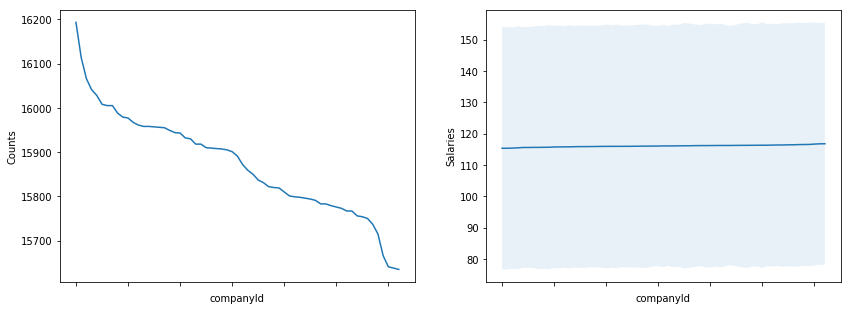

In [33]:
# Corelation betweeen target variable(salary) and JobId
plot_features(train_df,'companyId')

#### The above graph shows that thers is a weak coorealtion between Salary and CompanyId

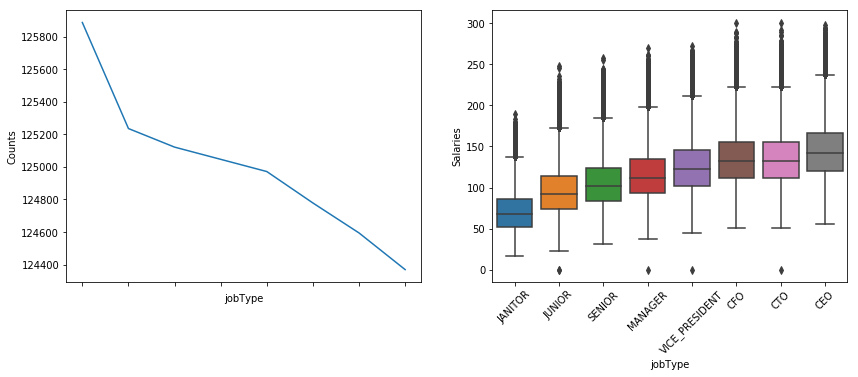

In [34]:
plot_features(train_df,'jobType')

#### The boxplot above shows a clear positive corelation between salaries and JobType

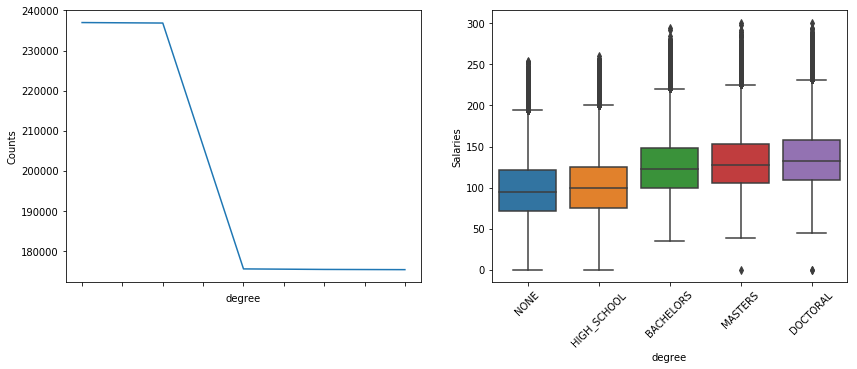

In [35]:
plot_features(train_df, 'degree')

#### As we can see more advanced degree tend to higher salaries range. So, we can see a bit of positive corelation among the two variables.

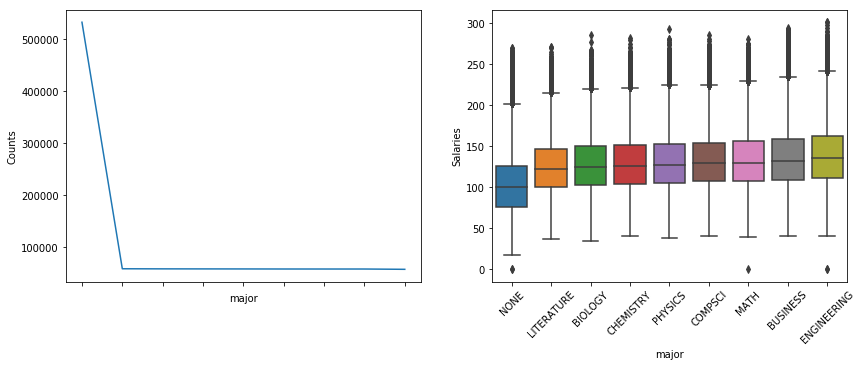

In [36]:
plot_features(train_df, 'major')

#### Major advanced degrees tend to higher salaries. Also, engineering majors have shown highest salries and person with no degre has the lowest salary.

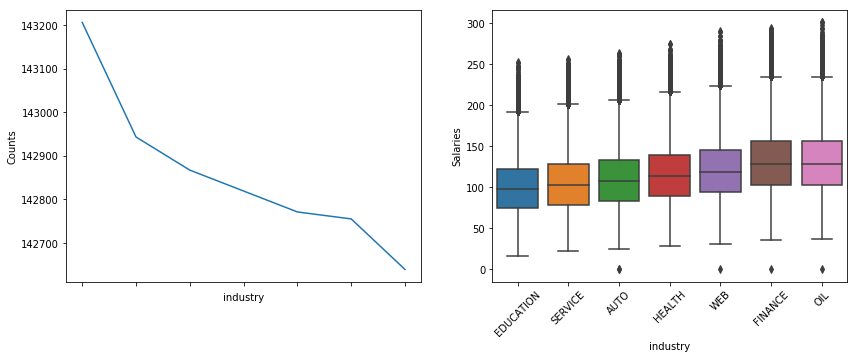

In [37]:
plot_features(train_df, 'industry')

#### Finance and oil industry pays relatively higher salaries than other industries.

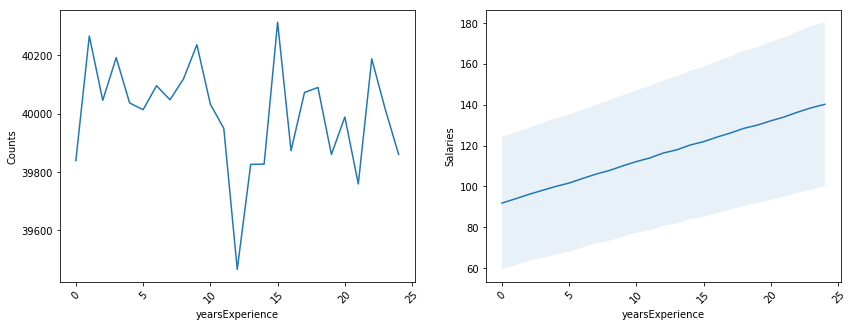

In [38]:
plot_features(train_df, 'yearsExperience')

#### There is a direct corelation with years of experience and salaries. In general this is true as well.

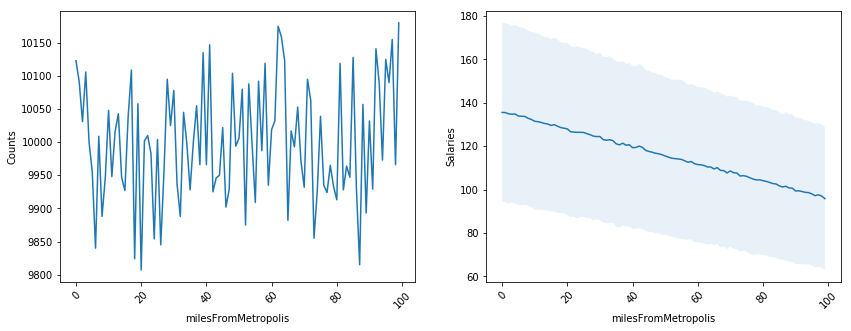

In [39]:
plot_features(train_df, 'milesFromMetropolis')

#### In general, salaries decrease as the distance from Metropolis increase since the salaries are sometimes dependent on population desnity and cost of living.

In [40]:
def encode_label(df, col):
    #encode the categories using average salary for each category to replace label
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()   
    df[col] = df[col].map(cat_dict)

In [41]:
# encoding labels for all categorical features
for col in train_df.columns:
    if train_df[col].dtype.name == "category":
        encode_label(train_df, col)

In [42]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,115.345049,135.458547,130.504903,133.319735,115.735540,10,83,130
1,JOB1362684407688,115.756548,145.311425,101.920654,102.583479,121.644512,3,73,101
2,JOB1362684407689,116.224249,125.367629,135.489433,130.372436,115.735540,10,38,137
3,JOB1362684407690,116.199380,115.367596,135.489433,129.072085,109.433690,8,17,142
4,JOB1362684407691,115.888501,125.367629,125.454663,130.372436,130.746743,8,16,163


#### Since we replaced all the categorical variable by label encoder function we have all our features as similar data types.

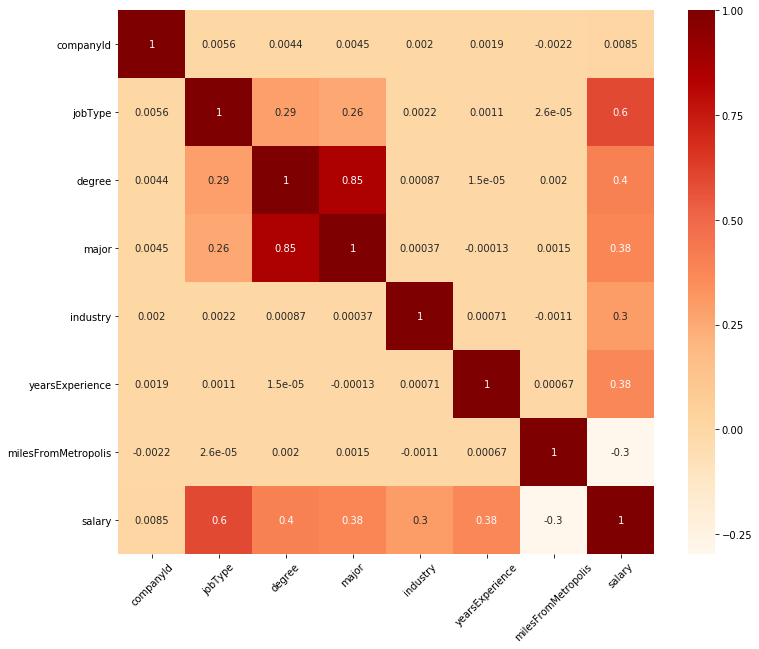

In [43]:
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df[features + ['salary']].corr(), cmap='OrRd', annot=True)
plt.xticks(rotation=45)
plt.show()

#### From the above heatmap, we can conclude that jobType is strongly corelated with salary,degree, major and yearsOfExperience

#### Supporting the analysis done above with the help of lineplot. Plotting the lineplot between yearExperience and salry.

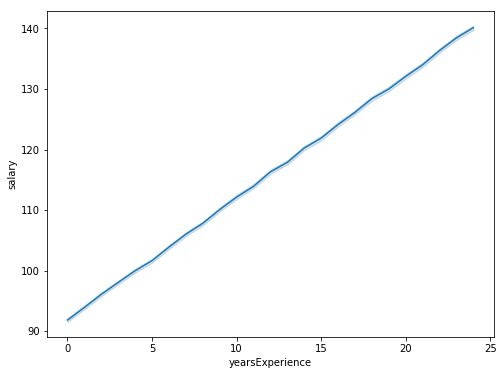

In [44]:
plt.figure(figsize=(8,6))
sns.lineplot(x='yearsExperience',y='salary',data=train_df)

#### We could clearly say that the salary increases with the yearsExperience

#### We also do the same for salary and milesFromMetropolis variable

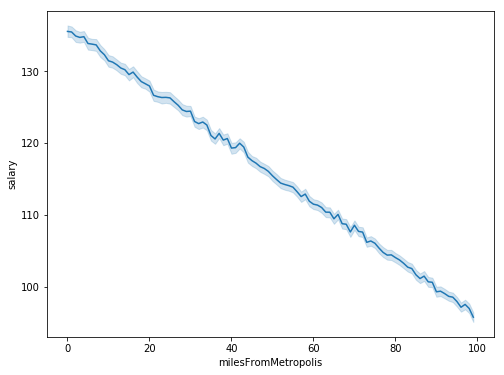

In [45]:
plt.figure(figsize=(8, 6))
sns.lineplot(x="milesFromMetropolis", y="salary", data = train_df);

#### The above plot supports our analysis of negative corelation between milesFromMetropolis and salary variable.

## 14. Final Data Preparation

### Now, we will be removing the Outliers and Prepare data to eastablish baseline and build our model for predictions. As we observed that CompanyID and JObID do not corelate with the target variable. Hence we will be dropping it from train and test data.

In [46]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,115.345049,135.458547,130.504903,133.319735,115.735540,10,83,130
1,JOB1362684407688,115.756548,145.311425,101.920654,102.583479,121.644512,3,73,101
2,JOB1362684407689,116.224249,125.367629,135.489433,130.372436,115.735540,10,38,137
3,JOB1362684407690,116.199380,115.367596,135.489433,129.072085,109.433690,8,17,142
4,JOB1362684407691,115.888501,125.367629,125.454663,130.372436,130.746743,8,16,163


In [47]:
train_df = train_df.drop('jobId', axis = 1)

In [48]:
train_df.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,115.345049,135.458547,130.504903,133.319735,115.735540,10,83,130
1,115.756548,145.311425,101.920654,102.583479,121.644512,3,73,101
2,116.224249,125.367629,135.489433,130.372436,115.735540,10,38,137
3,116.199380,115.367596,135.489433,129.072085,109.433690,8,17,142
4,115.888501,125.367629,125.454663,130.372436,130.746743,8,16,163


In [49]:
train_df = train_df.drop('companyId', axis = 1)

In [50]:
train_df.head(10)

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,135.458547,130.504903,133.319735,115.735540,10,83,130
1,145.311425,101.920654,102.583479,121.644512,3,73,101
2,125.367629,135.489433,130.372436,115.735540,10,38,137
3,115.367596,135.489433,129.072085,109.433690,8,17,142
4,125.367629,125.454663,130.372436,130.746743,8,16,163
5,115.367596,135.489433,132.075605,130.746743,2,31,113
6,135.458547,98.176467,102.583479,115.735540,23,24,178
7,95.331557,125.454663,129.072085,99.448386,9,70,73
8,70.813045,101.920654,102.583479,99.448386,1,54,31
9,125.367629,125.454663,129.072085,109.433690,17,68,104


In [51]:
test_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [52]:
test_features_df = test_features_df.drop('jobId', axis = 1)

In [53]:
test_features_df = test_features_df.drop('companyId', axis = 1)

In [54]:
test_features_df.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [76]:
test_features_df.head(10)

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


## Saving the preprocessed data into a new directory to use it for modeling in other notebook. The name of new directory will be preprocessed_data.

In [58]:
train_df.to_csv(r'C:\Users\admin\Desktop\Salary-prediction-through-job-descriptions\data_preprocessed\train.csv')

In [60]:
test_features_df.to_csv(r'C:\Users\admin\Desktop\Salary-prediction-through-job-descriptions\data_preprocessed\test.csv')

#### After doing the EDA we can definitly know that the problem will be best solved by Regression model. Hence, we can move forward to modeling stage.